In [2]:
import pandas as pd
import os 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
os.chdir('E:/Datascience/Days/DAY24.09')

df =  pd.read_csv('pulsar_stars.csv')

In [4]:
df.shape

(17898, 9)

In [5]:
df.head

<bound method NDFrame.head of         Mean of the integrated profile  \
0                           140.562500   
1                           102.507812   
2                           103.015625   
3                           136.750000   
4                            88.726562   
...                                ...   
17893                       136.429688   
17894                       122.554688   
17895                       119.335938   
17896                       114.507812   
17897                        57.062500   

        Standard deviation of the integrated profile  \
0                                          55.683782   
1                                          58.882430   
2                                          39.341649   
3                                          57.178449   
4                                          40.672225   
...                                              ...   
17893                                      59.847421   
17894            

In [6]:
df.tail

<bound method NDFrame.tail of         Mean of the integrated profile  \
0                           140.562500   
1                           102.507812   
2                           103.015625   
3                           136.750000   
4                            88.726562   
...                                ...   
17893                       136.429688   
17894                       122.554688   
17895                       119.335938   
17896                       114.507812   
17897                        57.062500   

        Standard deviation of the integrated profile  \
0                                          55.683782   
1                                          58.882430   
2                                          39.341649   
3                                          57.178449   
4                                          40.672225   
...                                              ...   
17893                                      59.847421   
17894            

In [7]:
# To check total count in each classs 0 & 1
df["target_class"].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [8]:
 #view the percentage distribution of target class columns
df["target_class"].value_counts()/np.float(len(df)) 

C:\Users\RAHUL GOPI\AppData\Local\Temp\ipykernel_5108\3732943143.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["target_class"].value_counts()/np.float(len(df))


0    0.908426
1    0.091574
Name: target_class, dtype: float64

In [9]:
df["target_class"].unique()

array([0, 1], dtype=int64)

### removing leading spaces from columns name

In [10]:
colnames=df.columns
colnames

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [11]:
df.columns=df.columns.str.strip() # To remove space before first word
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [12]:
# rename column names
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [13]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [15]:
df.isnull().sum() #To check total null (missing) values

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

Text(0, 0.5, 'DM-SNR Skewness')

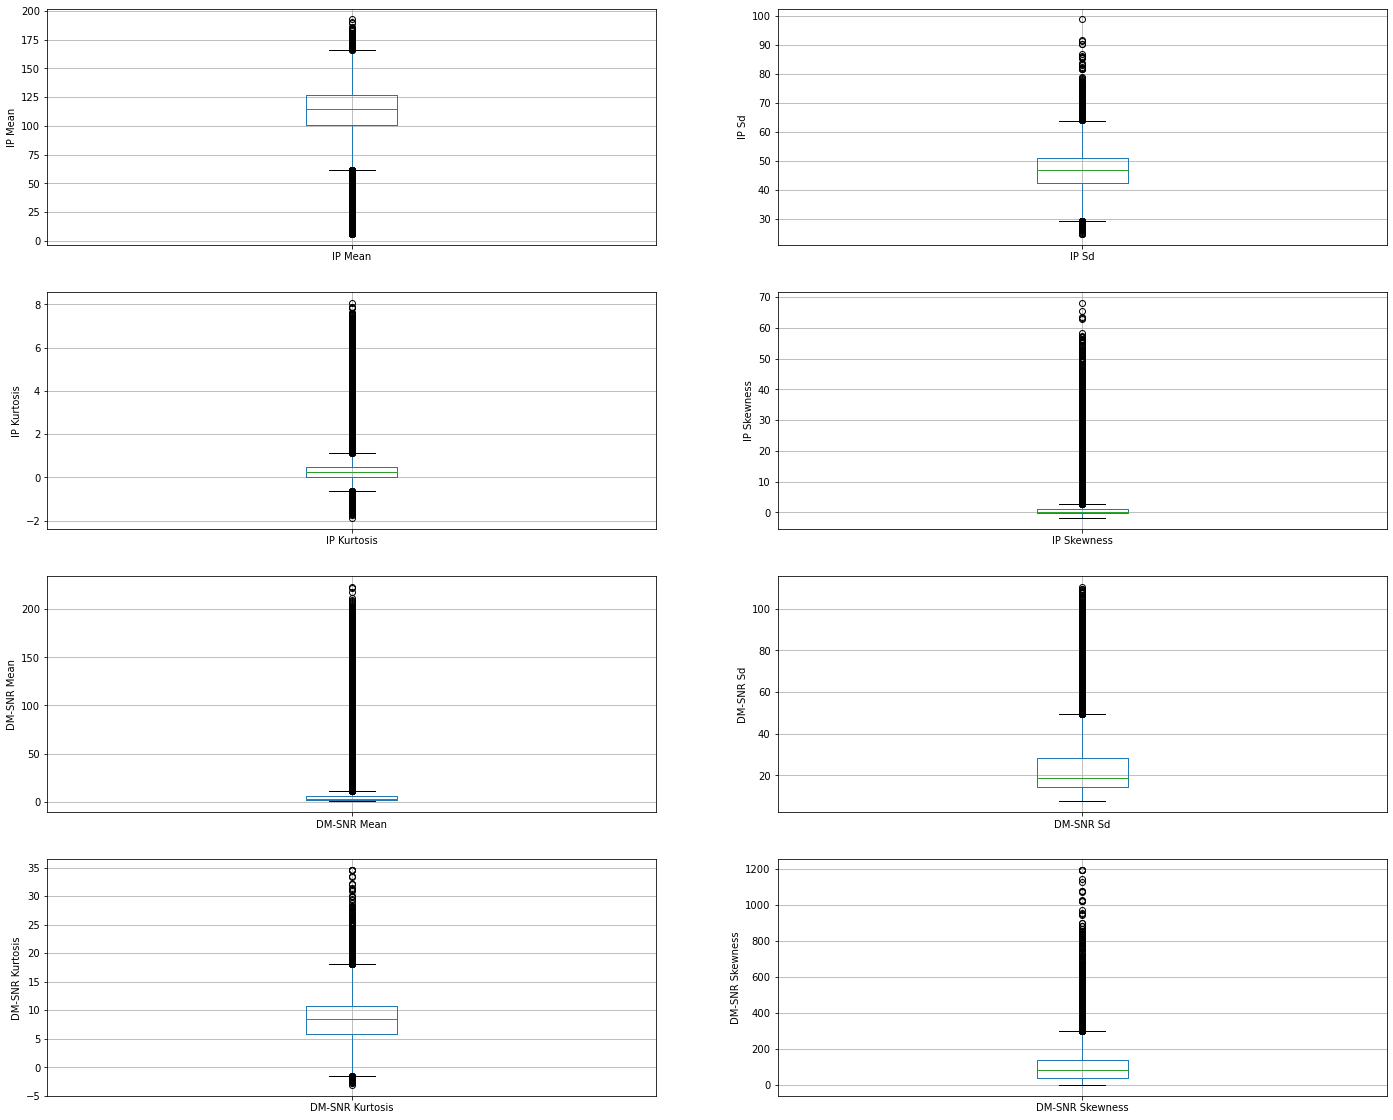

In [23]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

In [24]:
x=df.drop(['target_class'],axis=1) #We remove output
y=df['target_class']

In [25]:
x.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_class, dtype: int64

### split data into seperate training and test set

In [41]:
# split x and y 
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42) #####WHY?

In [51]:
x_test

array([[ 0.22713134,  0.34845304, -0.27471751, ..., -0.43789257,
        -0.04519685, -0.24841265],
       [-1.38425732, -1.77874097,  1.45804537, ..., -0.22458126,
        -0.28231734, -0.46104562],
       [-0.30451419,  0.06686687,  0.02507282, ..., -0.54632048,
         0.22137423, -0.00437859],
       ...,
       [ 0.05347063, -0.12111416, -0.28478065, ..., -0.24535962,
        -0.27447303, -0.47508007],
       [-0.77278879,  0.28237836,  0.36610849, ..., -0.39441613,
        -0.2307498 , -0.40089903],
       [-2.19711135, -2.07856945,  2.70105131, ...,  1.69950061,
        -1.43583669, -0.95647747]])

### Feature scaling

In [50]:
x_train

array([[-0.09033264,  0.14353445, -0.26978256, ..., -0.42392055,
         0.03108302, -0.19905513],
       [ 0.40840876,  0.63951948, -0.3716937 , ..., -0.75307789,
         1.29165925,  1.27257936],
       [-0.42181134, -0.39966624, -0.23040469, ..., -0.64107317,
         1.28465237,  1.01796354],
       ...,
       [ 0.19300854, -0.48676711,  0.17500187, ..., -0.75114379,
         1.92617096,  1.91541739],
       [ 0.95863904,  0.49673315, -0.53469677, ..., -0.24486373,
        -0.205029  , -0.40119748],
       [ 0.37611396,  0.57554704, -0.12387348, ..., -0.74271106,
         2.06013372,  2.07621541]])

In [52]:
cols=x.columns

In [32]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
x_train

array([[-0.09033264,  0.14353445, -0.26978256, ..., -0.42392055,
         0.03108302, -0.19905513],
       [ 0.40840876,  0.63951948, -0.3716937 , ..., -0.75307789,
         1.29165925,  1.27257936],
       [-0.42181134, -0.39966624, -0.23040469, ..., -0.64107317,
         1.28465237,  1.01796354],
       ...,
       [ 0.19300854, -0.48676711,  0.17500187, ..., -0.75114379,
         1.92617096,  1.91541739],
       [ 0.95863904,  0.49673315, -0.53469677, ..., -0.24486373,
        -0.205029  , -0.40119748],
       [ 0.37611396,  0.57554704, -0.12387348, ..., -0.74271106,
         2.06013372,  2.07621541]])

In [55]:
x_train=x_train.round(2)

In [ ]:
y_train=pd.DataFrame(y_train)

In [57]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svcmodel_0=SVC()
# fit classifier to training set
svcmodel_0.fit(x_train,y_train)
# make predictions on test set
y_pred=svcmodel_0.predict(x_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

C:\Users\RAHUL GOPI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Model accuracy score with default hyperparameters: 0.9793


In [58]:
svcmodel_100=SVC(C=100)
svcmodel_100.fit(x_train,y_train)

SVC(C=100)

In [59]:
y_pred100= svcmodel_100.predict(x_test)

C:\Users\RAHUL GOPI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [60]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred100)))

Model accuracy score with default hyperparameters: 0.9821


### RUN SVM with linear kernel

In [62]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
linear_svc.fit(x_train,y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(x_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9788


C:\Users\RAHUL GOPI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [64]:
# instantiate classifier with linear kernel and C=1.0
linear_svc100=SVC(kernel='linear', C=100.0) 

# fit classifier to training set
linear_svc100.fit(x_train,y_train)

# make predictions on test set
y_pred_test=linear_svc100.predict(x_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=100.0 : 0.9791


C:\Users\RAHUL GOPI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [65]:
# instantiate classifier with linear kernel and C=1.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 

# fit classifier to training set
linear_svc1000.fit(x_train,y_train)

# make predictions on test set
y_pred_test=linear_svc1000.predict(x_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1000.0 : 0.9791


C:\Users\RAHUL GOPI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [67]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(x_test, y_test)))

Training set score: 0.9791
Test set score: 0.9788


C:\Users\RAHUL GOPI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
